In [9]:
import cv2
from PIL import Image, ImageOps, ImageFilter 
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

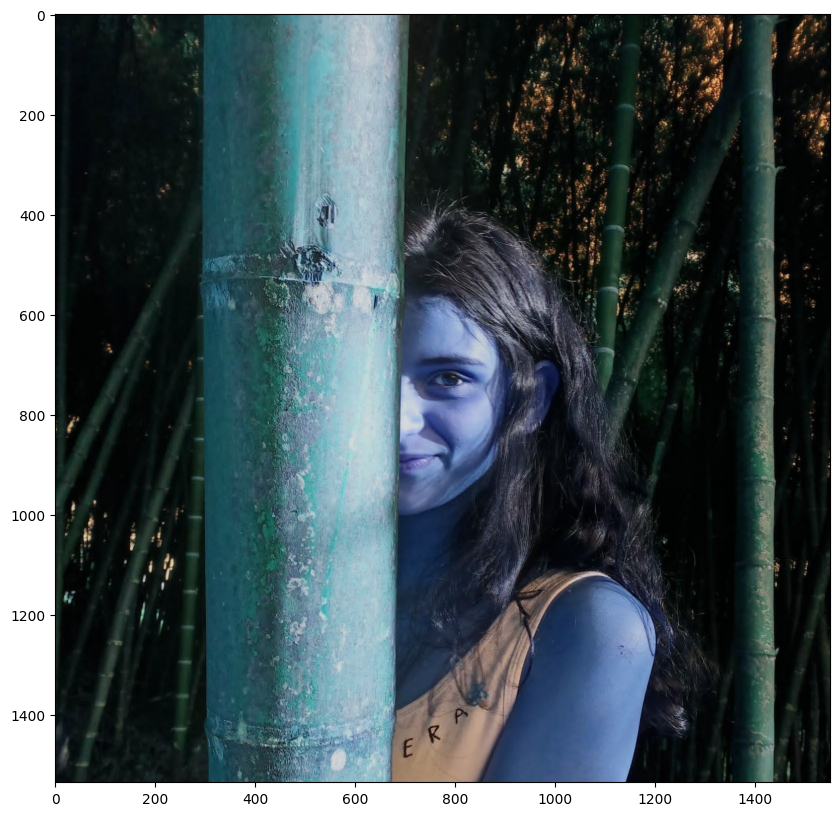

In [10]:
image= cv2.imread('Sunnylady.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

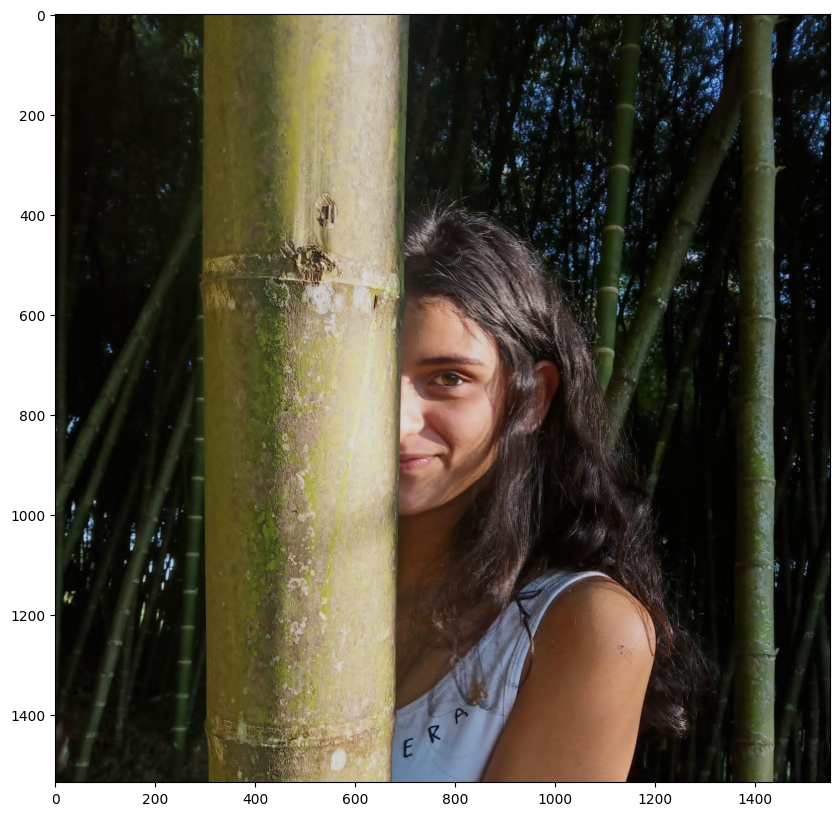

In [11]:
imagecor=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(imagecor)
plt.show()

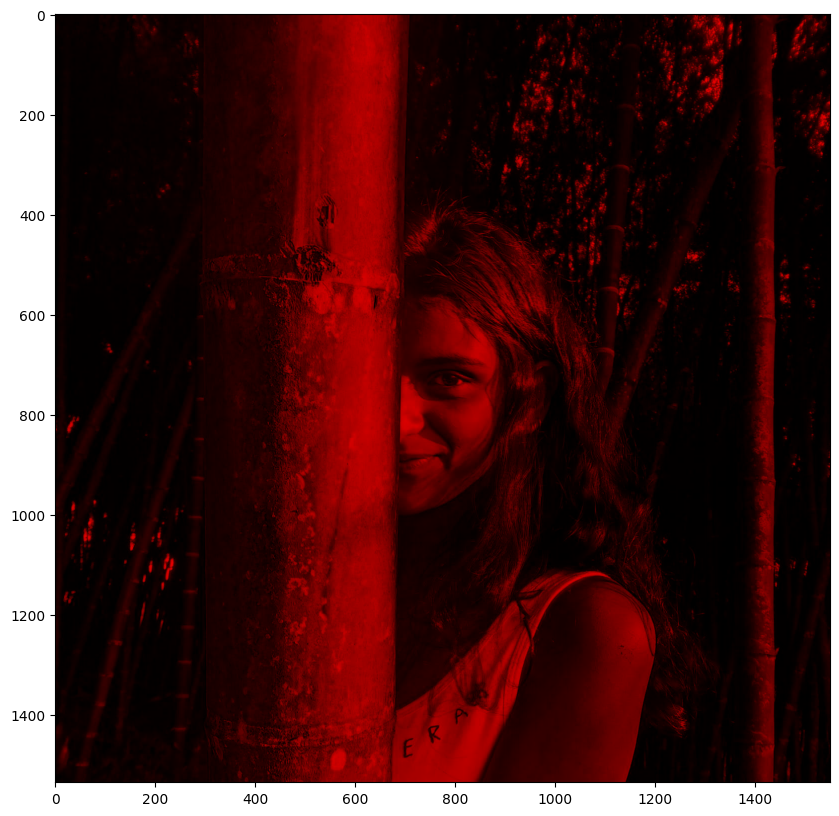

In [12]:
Solblue=imagecor.copy()
Solblue[:, :, 0] = 0
Solblue[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(Solblue, cv2.COLOR_BGR2RGB))
plt.show()

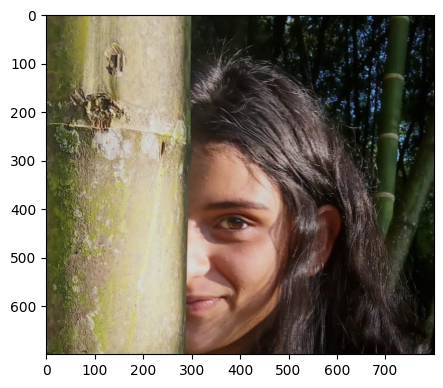

In [13]:
left=400
right=1200
lower=1000
upper=300
matrix=np.copy(imagecor)
corte=matrix[upper: lower ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(corte)

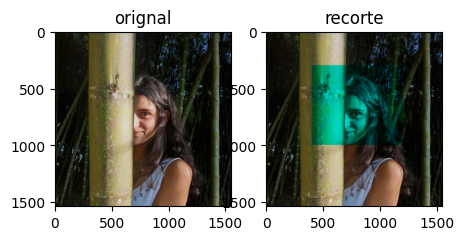

In [14]:
bluematrix = np.copy(matrix)
bluematrix[upper:lower, left:right, 0:1] = 1
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(matrix)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(bluematrix)
plt.title("recorte")
plt.show()

In [16]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
n_pruebas=1000
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_pruebas, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

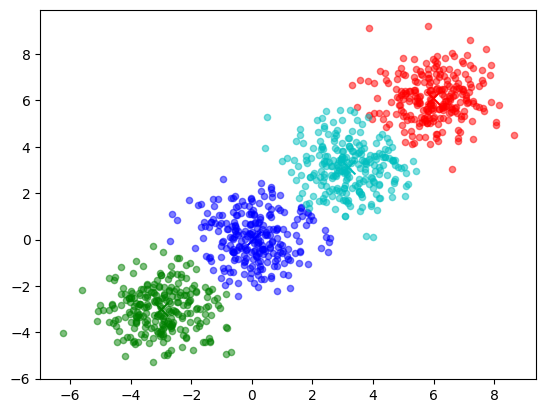

In [21]:
numClusters=4
km=KMeans(n_clusters=numClusters)
km.fit(X)
display_cluster(X,km,numClusters)

(1536, 1550, 3)

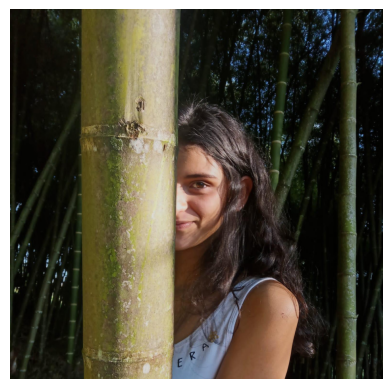

In [69]:
iclus=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(iclus)
plt.axis('off')
iclus.shape

(-0.5, 0.5, 0.5, -0.5)

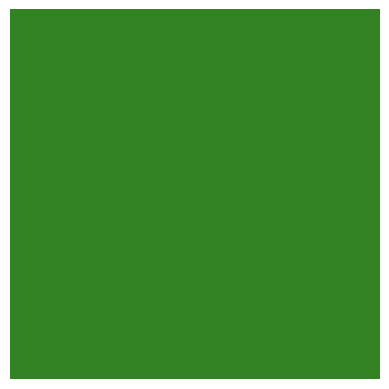

In [42]:
R = 50
G = 130
B = 35
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off')

In [47]:
iclusPlana=iclus.reshape(-1,3)
iclusPlana[:5,:]

array([[13, 10,  5],
       [14, 11,  6],
       [16, 13,  8],
       [17, 14,  9],
       [17, 14,  9]], dtype=uint8)

In [49]:
iclusPlana.shape

(2380800, 3)

In [80]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(iclusPlana)

In [81]:
iclusPlana2 = iclusPlana.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    iclusPlana2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

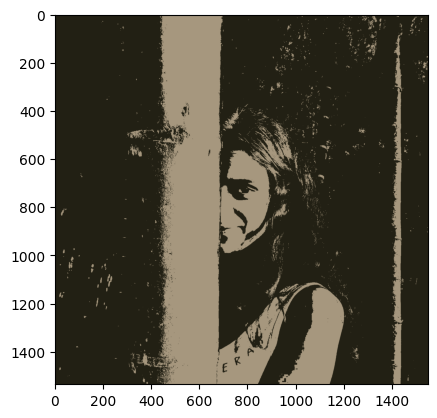

In [82]:
iclus2=iclusPlana2.reshape(iclus.shape)
plt.imshow(iclus2)

In [83]:
print(kmeans.inertia_)

6097845399.123693
